# Laboratorio: Spice
![](https://media-exp1.licdn.com/dms/image/C5612AQGqg7q8aZIKsg/article-cover_image-shrink_600_2000/0?e=1611792000&v=beta&t=XS0F9hZXXGl7ckQ1zJS7eo9P7u73mpZ69wRL_gssrWk)
---
## Autor: **David Lasanta**
  
  
# Objetivo del laboratorio
---
El objetivo de la presenta práctica es conocer el estándar de simulación de circuitos [SPICE](http://bwrcs.eecs.berkeley.edu/Classes/IcBook/SPICE) y realizar pequeñas simulaciones en corriente continua con el mismo. SPICE es una forma elegante y sencilla de codificar circuitos eléctricos de manera que puedan ser procesados por un ordenador. Mediante un sencillo lenguaje podemos definir resistencias, fuentes de alimentación, etc., las conexiones entre ellos y los resultados que deseamos obtener.



 # El estándar SPICE
 **SPICE** es una abreviabiación de *Simulation Program with Integrated Circtuit Emphasis*.
 Se trata básicamente de un método estándar para describir circuitos usando texto plano en
 lugar de una representación gráfica (o *esquemática*). A esta descripción en texto se
 la llama también **netlist** y básicamente se corresponde con la *lista* de los componentes del circuito y cómo estos están conectados entre sí, es decir, de los nodos de unión.
 Los ficheros netlist pueden tener extensiones `.cir`, `.net`, `.ckt`, ó `.sp` y es muy común encontrárselos con cualquiera de estas.

 Existen en el mercado muchas variantes (intérpretes) de Spice, aunque el original fue descrito
 en la Universidad de Berkeley. En la lista de intérpretes de Spice tenemos desde esfuerzos y proyectos comerciales hasta *open source* y regidos por distintas comunidades de usuarios y programadores.

> **Pregunta:** Enumera todos los intérprete de Spice que puedas encontrar. Crea una tabla en Markdown con varias columnas (para el nombre, fabricante, versión actual, licencia y alguna característica sobresaliente). Aquí tienes un ejemplo del que puedes partir y seguir completando:

### Intérpretes libres ###

| Intérprete | Versión actual | Licencia       | Autor              | Características            |
| ---------- | -------------- | -------------- | ------------------ | -------------------------- |
| Ahkab      | 0.18 (2.015)   | GPL            | Giuseppe Venturini | Basado en Python           |
| Spice      | 3              | No especifican | Dr. Laurence Nagel | Spice original U. Berkeley |
| PySpice    | 1.4 (2.020)    | GPL v3         | Fabrice Salvaire   | Módulo Python open source  |
| NgSpice    | 3.3 (2.020)    | (CC-BY-SA)v4.0 | Varios (ver web)   | Basado en C                |
| ASCO tool  | ASCO-0.4.10    | GNU GPL        | Joao Ramos         | Basado en FORTRAN          |
| gEDA       | estable 1.8.2  | GNU            | Ales Hvezda et al. | Basado en C                |
| Gnucap     | 0.33           | GNU            | Albert Davis       | Basado en C                |
| MacSpice   | 3.1.22         | No especifican | Charles Williams   | Act. tecnología INTEL      |
| Oregano    | 0.84.43        | GNU            | Richard Hult       | Para Linux      		     |
| Qucs       | 0.0.19         | GNU GPL v2+    | Michael Margraf    | Basado en C++              |



### Intérpretes de software propietario ###

| Intérprete           | Versión actual | Licencia       | Autor               | Características            |
| -------------------- | -------------- | -------------- | ------------------- | -------------------------- |
| Spice OPUS           | 2.33           | (c)            | Tadej Tuma          | Basado en C                |
| PSpice               | 17.2           | EDA            | John Durbetaki      | Plugin para OrCAD          |
| HSpice               | M-2017.03      | SAE            | Synopsys            | Parte de uns suite de pago |
| Proteus Design Suite | 8.7 SP1        | EDA            | John Jameson        | Tipo CAD                   |
| Intusoft             | V8.x.11        | EDA            | Intusoft            | Basado en C++              |
| SIMetrix Intro       | 8.40c          | (c)            | SIMetrix            | Basado en C                |
| TopSPICE             | 8.84           | (c)            | Penzar Development  | Basado en C++              |
| Mentor Graphics      | No especifican | EDA            | Mentor / Siemens    | Soporta fichero encriptados|
| Tina Pro	           | v12            | EDA            | Dr. Dogan Ibrahim   | Opción Cloud               | 
| Multisim             | v12            | EDA            | NATIONAL INSTRUMENTS| On Line                    |
| Altium Designe       | altium 365     | PCB            | Nick Martin         | Plataforma Cloud           | 

> **Curiosidad:** Por norma general, las versiones libres exponen las caractareisticas de su versión de forma simple y directa. En software propietario, esta **"adornado"** con expresiones como **"referente de la industria"**, **"el mejor en su rango de precio"**, **"la solución mas completa"**, etc...

---
 
> **Pregunta:** ¿Qué comparación puedes efectuar entre C y Spice como estándares (lenguajes) y sus respectivas implementaciones en software? ¿Qué implementaciones reales (compiladores) del lenguaje C conoces? 

**Comparación entre C y Spice:**

**C** es un lenguaje de programación de propósito general, pero **Spice** es un estándar internacional cuyo objetivo es simular circuitos electrónicos analógicos compuestos por resistencias, condensadores, diodos, transistores, etc.






 ## Elementos de un netlist
 Como acabamos de comentar, un netlist se corresponde con la codificación de los elementos electrónicos de un circuito y las uniones entre los mismos. Veamos con más concreción qué partes y secciones lo componen.

 ## Comentarios

 La primera línea de un netlist se corresponderá siempre con un comentario. A partir de esta línea se pueden introducir más comentarios pero tienen que ir siempre precedidos de un `*`. Ejemplo:
 
 ```spice
 Mi primer circuito
 * Otro comentario
 * más comentarios
 *
 ```

 ## Dispositivos básicos de un circuito
 Los elementos de un netlist son los mismos que encontramos en cualquier circuito eléctrico sencillo,
 tales como resistencias, **condensadores**, **bobinas**, **interruptores**, **hilos** y **fuentes** de alimentación.
 Para distinguir uno de otro, se reserva una letra característica: `V` para fuentes de alimentación, `R` para resistencias, `C` para condensadores y `L` para bobinas. También es posible usar estas letras en su versión en minúscula (`r`, `v`, `c`, `l`, etc.).
 Después de esta letra característica se puede sufijar cualquier texto para diferenciar un elemento de otro (números, letras, palabras, etc.). Ejemplo:

 ```
 * Una resistencia
 R1
 *  Otra resistencia
 R2
 * Fuente de alimentación
 V
 * Un condensador
 Cprincipal
 ```

 ## Conexiones
 A continuación de indicar el elemento eléctrico, tenemos que informar a Spice cuáles
 son los puntos de unión tanto a un lado como al otro del elemento.
 Así es como Spice sabe qué está conectado a qué: porque comparten un **punto**
 (o **nodo**, aunque este término se reserva sobretodo a uniones de más de dos elementos)
 que hemos señalizado correctamente. Para nombrar nodos, lo mejor es emplear una
 numeración secuencial: 0...n. **La enumeración de los puntos de unión es completamente
 a nuestro criterio**.

 ```
 * Una resistencia
 * entre cables 0 y 1
 R1 0 1
 ```

 **Sólo es necesario seguir un criterio**: en el caso de una
 fuente de alimentación, el nodo que pondremos primero será
 aquel que está más cerca del *borne* positivo. Ejemplo:

 ```spice
 * Para una fuente indicamos primeramente conexión a nodo positivo.
 v 2 3 type=vdc vdc=1
 ```
 
En el *caso de LTspice* no es necesario indicar los parámetros `type=vdc` y `vdc=X`, sino que si no se especifica nada, se supone que el último valor es el del voltaje a corriente continua:

```spice
* Especificación de una fuente de alimentación de 10 V en corrient continua en el caso de LTspice
v 0 1 10
```

Aquí tienes un ejemplo gráfico de los componentes comentados justo arriba (resistencia y voltaje):

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencia%20y%20pila%20con%20nodos.svg?sanitize=true)

 ## Unidades en SPICE

 Las unidades de las magnitudes características del circuito son siempre [unidades
 del Sistema Internacional](https://en.wikipedia.org/wiki/SI_electromagnetism_units) y no es necesario indicarlo explícitamente en el netlist.

 La forma de especificar múltiplos de estas cantidades es añadiendo una letra.
 Básicamente las que nos interesan y las que suelen aparecer mayoritariamente son `k` para "kilo-," `m` para "mili?" y `u` para "micro?".

 > **Pregunta:** Crea una tabla en Markdown con todos los prefijos de múltiplos que puedas, su abreviatura y su equivalencia numérica.

| Múltiplo    | Prefijo | Abreviatura |
| ----------- | ------- | ----------- |
| $$10^{24}$$ | yotta   | $$Y$$       |
| $$10^{21}$$ | zetta   | $$Z$$       |
| $$10^{18}$$ | exa     | $$E$$       |
| $$10^{15}$$ | peta    | $$P$$       |
| $$10^{12}$$ | tera    | $$T$$       |
| $$10^{9}$$  | giga    | $$G$$       |
| $$10^{6}$$  | mega    | $$M$$       |
| $$10^{3}$$  | kilo    | $$k$$       |
| $$10^{2}$$  | hecto   | $$h$$       |
| $$10^{1}$$  | deca    | $$da$$      |
| $$10^{-1}$$ | deci    | $$d$$       |
| $$10^{-2}$$ | centi   | $$c$$       |
| $$10^{-3}$$ | mili    | $$m$$       |
| $$10^{-6}$$ | micro   | $$\mu$$     |
| $$10^{-9}$$ | nano    | $$n$$       |
| $$10^{-12}$$| pico    | $$p$$       |
| $$10^{-15}$$| femto   | $$f$$       |
| $$10^{-18}$$| ato     | $$a$$       |
| $$10^{-21}$$| zepto   | $$z$$       |
| $$10^{-24}$$| yocto   | $$y$$       |

---

 
 
En el caso de las fuentes de alimentación hemos de especificar si se trata de corriente contínua (`vdc`) o alterna (`ac`).

```
 * Una resistencia de 5 Ohmios
 R2 1 0 5
 * Una pila de 10 Voltios (continua)
 V1 1 0 type=vdc vdc=10
 * Una resistencia de 5 kΩ
 RX 2 4 5k
```

 > **Pregunta**: ¿qué unidades del Sistema Internacional relacionadas con la asignatura –y los circuitos en general– conoces? Responde aquí mismo en una celda de Markdown con una tabla.
 
| Abreviatura            | Unidad física              | Abreviatura | Unidad física         | Abreviatura | Unidad física         |
| ---------------------- | -------------------------- | ----------- | --------------------- | ----------- | --------------------- |
| $$A$$                  | amperio                    | $$H$$       | henry                 | $$nm$$      | nanómetro             |
| $$\overset{\circ}{A}$$ | angstrom                   | $$h$$       | hora                  | $$pt$$      | pinta                 |
| $$atm$$                | atmósfera                  | $$Hz$$      | hertz                 | $$qt$$      | cuarto de galón       |
| $$Btu$$                | unidad térmica británica   | $$in$$      | pulgada               | $$rev$$     | revolición            |
| $$Bq$$                 | becquerel                  | $$J$$       | julio                 | $$R$$       | roentgen              |
| $$C$$                  | culombio                   | $$K$$       | kelvin                | $$Sv$$      | seivert               |
| $$^{\circ}{C}$$        | grado Celsius              | $$kg$$      | kilogramo             | $$s$$       | segundo               |
| $$cal$$                | caloría                    | $$km$$      | kilómtero             | $$T$$       | tesla                 |
| $$Ci$$                 | curie                      | $$keV$$     | kiloelectrón voltio   | $$u$$       | ud. de masa unificada |
| $$cm$$                 | centímetro                 | $$lb$$      | libra                 | $$V$$       | voltio                |
| $$din$$                | dina                       | $$L$$       | litro                 | $$W$$       | vatio                 |
| $$eV$$                 | electrón voltio            | $$m$$       | metro                 | $$Wb$$      | weber                 |
| $$^{\circ}{F}$$        | grado Fahrenheit           | $$MeV$$     | megaelectrón voltio   | $$a$$       | año                   |
| $$fm$$                 | femtómtero                 | $$Mm$$      | megámetro             | $$yd$$      | yarda                 |
| $$ft$$                 | pie                        | $$mi$$      | milla                 | $$\mu m$$   | micrómetro            |
| $$Gm$$                 | gigámtro                   | $$min$$     | minuto                | $$\mu s$$   | microsegundo          |
| $$G$$                  | gauss                      | $$mm$$      | milímetro             | $$\mu C$$   | microculombio         |
| $$Gy$$                 | gray                       | $$ms$$      | milisegundo           | $$\Omega$$  | ohmio                 |
| $$g$$                  | gramo                      | $$N$$       | newton                |             |                       | 



 

## Valores iniciales

 Aparecen justo al final de la definición del componente (`ic`). Suelen aplicarse principalmente con condensadores.

 ```
 * Una condensador inicialmente no cargado
 c 1 0 1u ic=0
 ```

 ## Fin del circuito

 El fin de la descripción de un netlist se especifica mediante el
 comando `.end`.

 ```spice
 * Mi primer circuito
 V 1 0 vdc=10 type=vdc
 R 1 0 5
 * Fin del circuito
 .end
 ```


 ## Comandos SPICE para circuitos en corriente continua

 Además de la descripción del circuito, hemos de indicar al intérprete de Spice qué
 tipo de análisis queremos realizar en sobre el mismo y cómo queremos presentar
 la salida de la simulación. Los comandos en Spice empiezan por un `.` y suelen
 escribirse justo al final del circuito, pero antes del comando `.end`.

 ```
  Mi primer circuito
 * Aquí van los componentes
 R 1 0 6k
 ...
 * Comandos
 .op
 ...
 * Fin del circuito
 .end
 ```

 > **Pregunta**: Hasta lo que has visto del lenguaje Spice, ¿dentro de qué tipo o conjunto de lenguajes encajaría? ¿Funcionales? ¿Específicos de dominio? ¿Procedurales? ¿Estructurados? ¿Orientado a Objetos ¿Funcionales? Justifica tu respuesta. 
 
**Spice**  encaja dentro de la programación estructurada, ya que se implementa con una secuencia que indica el orden de ejecución de las instrucciones. Tambien puede ser considerado un lenguaje específico de dominio, ya que está optimizado para una clase específica de problemas.

Veamos los principales comandos de simulación:

 - `.op` es el comando más sencillo que podemos emplear en. Devuelve el voltaje e intensidad en cada ramal y componente del circuito. Este comando no necesita parámetros.
 - `.dc` es uy parecido al comando `.op` pero nos permite cambiar el valor del voltaje de una fuente de alimentación en pasos consecutivos entre el valor A y el valor B.
 En el caso de que la fuente tuviera asignada ya un valor para su voltaje, este sería ignorado. Ejemplo:


 ```spice
 * Variamos el valor del voltaje
 * de la fuente "v" de 1 a 1000
 * en pasos de 5 voltios
 v 1 0 type=vdc vdc=10
 .dc v 1 start=1 stop=1000 step=20
 v2a 2 4 type=vdc vdc=9
 * Igual para v2a. Se ignora su voltaje de 9V
 .dc v2a start=0 stop=10 step=2
 ```

 - El comando `.tran` realiza un análisis en el tiempo de los parámetros del
 circuito. Si no se emplea la directiva `uic` (*use initial conditions*) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo `tfinal`.
 y en intervalos `tstep`. Si empleamos un varlor distinto para parámetro `uic`,
 entonces se hará uso de las condiciones iniciales definidas para cada componente
  (típicamente `ic=X` en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).


 ```
 * Hacemos avanzar el tiempo entre
 * tinicial y tfinal en pasos tstep
 .tran tstart=X tstop=Y tstep=Z uic=0/1/2/3
 ```

 `X`, `Y` y `Z` tienen, evidentemente unidades de tiempo en el S.I. (segundos).



 > **Pregunta**: El parámetro `uic` puede tener varios valores y cada uno significa una cosa. Detállalo usando un celda Markdown y consultando la [documentación de Ahkab](https://buildmedia.readthedocs.org/media/pdf/ahkab/latest/ahkab.pdf).
 
**UIC (Use Initial Conditions)**: Usado para especificar el estado del circuito en el momento time t = tstart.
Los valores disponibles son 0, 1, 2 o 3, con los siguientes resultados:

| Valor | Estado del circuito |
| ----- | :---------------------------------------------------------------------------------------------------------------------------------- |
| uic=0 | Se supondrá que todos los voltajes y corrientes de los nodos a través de las fuentes v / h / e / son cero en **t = tstart**         |
| uic=1 | El estado en **'t = tstart** es el último resultado de un análisis OP                                                               |
| uic=2 | El estado en **t = tstart** es el último resultado de un análisis OP en el que se establecen los valores de corrientes a través de inductores y voltajes en condensadores especificados en su ic. Esto se hace muy aproximadamente, se recomienda comprobar. |
| uic=3 | Cargar un ic proporcionado por el usuario. Esto requiere una directiva **.ic** en algún lugar de la lista de conexiones y una El nombre de **.ic** y **ic_label** deben coincidir. |

 

## Intérprete SPICE que vamos a usar: Ahkab
Tras un estándar siempre hay una o varias implementaciones. Ahkab no deja de ser una implmentación más en Python del estándar Spice.
> **Pregunta:** Comenta las distintas implementaciones de lenguajes y estándares que conozcas. Hazlo usando una tabla en Markdown. [Aquí](https://www.markdownguide.org/extended-syntax/#tables) tienes un poco de ayuda (aunque antes ya se ha puesto el ejemplo de una tabla).
  
| Estandar   | Implementación |
| ---------- | -------------- |
| ECMAScript | JavaScript     |
| ECMAScript | JScript        |
| ECMAScript | ActionScript   |
| Python     | CPyton         |
| Python     | IronPython     |

---

> **Pregunta:** Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc.).

### Autor: ###
El autor de **Ahkab** es [Giuseppe Venturini](https://github.com/ggventurini), con contribuciones de [Ian Daniher](https://github.com/itdaniher), [Rob Crowther](https://github.com/weilawei) y otros.

### Objetivos: ###
Distribuido bajo licencia Open Source (GNU), el objetivo del software es la simulación de circuitos, aportando como valor añadido, respecto a otros software de mismo fin, la impresión de todas la matrices de ecuaciones, insistiendo en la disponibilidad bajo una licencia "copy left".

### Versiones: ###
A fecha de creación del presente documento, Akhab se encuentra en su versión 0.18, de fecha 17 de abril de 2.017, segun su [web](https://ahkab.readthedocs.io/en/latest/), aunque la fecha de *release* que consta en su repositorio de [github.com](https://github.com/ahkab/ahkab), es el 12 de julio de 2.015.
Existen 7 [versiones](https://github.com/ahkab/ahkab/releases) anteriores, desde la 0.10, a la 0.17.

### Licencia: ###
Como se ha comentado, la [licencia](https://ahkab.readthedocs.io/en/latest/misc/COPYING.html), bajo la que se distubuye el software es la GNU, mas concretamente, la versión 2 (GNU v2) de este tipo de lincencia de proposito general.

### Caracteristicas principales: ###
Como implementación del estandar Spice, nos encontramos un un programa ligero y de uso sencillo.

#### Simulaciones compatibles: ####
- **Numérico**:
    - Punto de operación , con cálculo de conjeturas para acelerar la solución. Ver ejemplo: Espejo de corriente descendente
    - Barrido de CC
    - Análisis de transitorios , fórmulas de diferenciación disponibles: Euler implícito, trapezoidal, órdenes de marcha de 2 a 5. Ver por ejemplo la simulación de un oscilador de Colpitts .
    - Análisis de CA
    - Análisis PZ
    - Análisis periódico de estado estable de circuitos no autónomos, disparos en el dominio del tiempo y algoritmos de fuerza bruta.
- **Simbólico**:
    - Análisis de pequeña señal , AC o DC, con extracción de funciones de transferencia, ganancia DC, polos y ceros. Varios ejemplos de análisis simbólico en esta página .

Los resultados se guardan en el disco, se grafican o imprimen en la salida estándar y se pueden leer / procesar con las herramientas más comunes (por ejemplo , [Octave](http://www.gnu.org/software/octave/) , [gnuplot](http://www.gnuplot.info/) , [Matlab](http://www.mathworks.com/products/matlab/) , [gwave](http://www.telltronics.org/software/gwave/) y otras)

### Dependencias ###

El programa redistribuye la libreria *py3compat.py*.

El programa requiere **Python 2** (>=v.2.6) o **Python 3** (>=v.3.3).

**numpy** >= 1.7.0

**scipy** >= 0.14.0

**sympy** >= 0.7.6

**tabulate** >= 0.7.3


y se recomiena tener instalado:

**matplotlib** >= 1.1.1

**nose** (para para ejecutar la suite de pruebas)


### Otras caracteristicas ###
Como otras iniciativas Open Source, la gente de Ahkab solicita donciones para soportar los costes de desarrollo. Pero... en este caso en concreto, si alguien quiere colaborar en el soporte del desarrollo de Ahkab, se solicita una donación a dos entidades que **investigan en la curación del cancer**:

[Association for International Cancer Research (eng)](http://www.aicr.org.uk/donate.aspx)

[Fond. IRCCS Istituto Nazionale dei Tumori (it)](http://www.istitutotumori.mi.it/modules.php?name=Content&pa=showpage&pid=24)



 # Trabajo práctico
 Muy bien, ahora toca definir circuitos y ejecutar simulaciones sobre los mismos gracias a Ahkab.
 ## Instalación de bibliotecas necesarias
 Si estás utilizando Anaconda, asegúrate de tener su entorno activado:
 
 ```cmd
 C:\> conda activate base (en el caso de Windows)
 ```
 ó

 ```bash
 $ source /usr/local/Caskroom/miniconda/base/bin/activate (en el caso de macOS)
 ```

En el caso de Windows tienes que tener en el PATH el directorio donde se encuentre el comando `conda` (visita la sección de [Environment Variables](https://superuser.com/questions/949560/how-do-i-set-system-environment-variables-in-windows-10) del [Panel de Control](https://www.digitalcitizen.life/8-ways-start-control-panel-windows-10)). Si has instalado Anaconda con [esta opción](https://docs.anaconda.com/_images/win-install-options.png) marcada, ya no tienes que preocuparte por ello. 

En el caso de usar Visual Studio Code, este puede encontrar automáticamente la distintas distribuciones de Python que tengamos instaladas y si abrimos un terminal, este se adaptará automáticamente al entorno Python que hayamos seleccionado. 

![](https://raw.githubusercontent.com/microsoft/vscode-python/main/images/InterpreterSelectionZoom.gif)

Ahora ya puedes instalar Ahkab:

 ```
 (base) $ pip install ahkab
 ``` 

También puedes instalar Ahkab directamente desde este mismo notebook:

In [90]:
!pip install ahkab


 Como siempre, una vez instalado cualquier framework para Python, ya lo podemos utilizar, tanto desde el [REPL](https://en.wikipedia.org/wiki/Read–eval–print_loop) como desde un entorno Jupyter (Jupyter, [Jupyterlab](http://jupyterlab.readthedocs.io/en/stable/), VS Code o nteract). Recuerda que para usar el kernel Python (que viene con Anaconda) desde nteract debes seguir las instrucciones que se indican en su [documentación oficial](https://nteract.io/kernels). 

Como vamos a pintar algunas gráficas, necesitamos instlar [matplotlib](https://matplotlib.org). Al igual que con Ahkab, esto lo podemos hacer directamente desde este mismo notebook. Si hemos usado Anaconda: 

In [91]:
!conda install -y -c conda-forge matplotlib

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

# All requested packages already installed.



In [92]:
import pylab as plt
import ahkab

> **Pregunta:** ¿Qué es y para qué sirve PyLab?

**PyLab** es un conglomerado de varias librerías entre las que se incluyen **numpy**, **scipy**, **sympy**, **pandas**, **matplotlib** y **ipython**. 

Con esta suite podremos usar de manera muy parecida al interprete de Python como si de MatLab se tratara y hacer nuestros .py como si fueran scripts de MatLab.

La ventaja, es que PyLab es Open Source y MatLab, es propiedad de la empresa [MathWorks](https://www.mathworks.com/products/matlab.html). 

 ## Circuitos sencillos para trabjar con la ley de Ohm:

 La *mal llamada* ley de Ohm reza que el voltaje (la *energía por unidad de carga*) que se disipa en un tramo de un circuito eléctrico es equivalente a la intensidad ($I$) de la corriente (es decir, cuántos electrones circulan por unidad de tiempo) por la resistencia del material ($R$) en el que está desplazándose dicha corriente. Matemáticamente:

 $$
 V = I\cdot R
 $$

 > **Pregunta:** comprueba que la ecuación anterior está ajustada a nivel dimensional, es decir, que la naturaleza de lo que está a ambos lados del signo igual es la misma. Realiza este ejercicio con LaTeX en una celda Markdown.



## Ley de Ohm :##
$ V = I \cdot R$

---
### $V$ (voltaje) ###
El voltio se define de forma equivalente como la diferencia de potencial existente entre dos puntos tales que hay que realizar un trabajo de 1 J para trasladar del uno al otro la carga de 1 C.

$ V = \frac{J}{C}$

### $I$ (intensidad) ###
El amperio es una unidad básica, junto con el metro, el segundo, y el kilogramo.5​Su definición no depende de la cantidad de carga eléctrica, sino que a la inversa, el culombio es una unidad derivada definida como la cantidad de carga desplazada por una corriente de un amperio en un período de tiempo de un segundo.

$I = \frac{C}{s}$

### $R$ (resistencia) ###
Se define a un ohmio como la resistencia eléctrica que existe entre dos puntos de un conductor, cuando una diferencia de potencial constante de 1 voltio aplicada entre estos dos puntos, produce, en dicho conductor, una corriente de intensidad de 1 amperio (cuando no haya fuerza electromotriz en el conductor).

$R = \frac{J \cdot s}{C^2}$

---

Por lo tanto, si $V = I \cdot R$:
$$ \frac{J}{C} = \frac{C}{s} \cdot \frac{J \cdot s}{C^2} $$

reordenando: 
$$ \frac{J}{C} = \frac{s \cdot C \cdot J}{s \cdot C^2} $$

y despejando $s$ y $C$ obtenemos:

$$ \frac{J}{C} = \frac{J}{C} $$

---

**Queda demostrado que la naturaleza de lo que está a ambos lados del signo igual es la misma.**




Comencemos con el circuito más sencillo posible de todos:

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/primer%20circuito.svg?sanitize=true)

Vamos a escribir su contenido (componentes o *netlist*) en disco con el nombre `circuito sencillo.sp`. Esto lo podemos lograr directamente y en tiempo real desde una celda de Jupyter gracias a los *comandos mágicos* de este entorno de programación literaria. En concreto vamos a utilizar `%%writefile` que guarda los contenidos de una celda como un fichero. 

In [93]:
%%writefile "circuito sencillo.sp"
* Este es un circuito sencillo
r1 1 0 100
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.end


Overwriting circuito sencillo.sp


Ahora vamos a leer su descripción con Ahkab, interpretar y ejecutar las simulaciones que en él estén descritas.

In [94]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('circuito sencillo.sp')

 Separamos la información del netlist (componentes) de los análisis (uno de tipo `op` y otro de tipo `dc`):

In [95]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
print(lista_de_análisis)


[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


> **Pregunta:** ¿qué tipo de estructura de Python es `lista_de_análisis`?

La ejecución de ```print(lista_de_análisis)```, arroja una estructura ```[{},{}]```

La estructura, al estar contenida entre corchetes, se conoce en python como *'lista'*.

El interior de la estructura, esta formado por dos series de datos entre llaves *{}*, conocido en python como *'diccionarios'*.

---
Las simulaciones que implican listas de datos (`.dc`, `.tran`, etc.) necesitan de un fichero temporal (`outfile`)
 donde almacenar los resultados. Para ello tenemos que definir la propiedad `outfile`.

 > **Pregunta:** escribe el código Python necesario para identificar qué análisis de `lista_de_análisis`
 son de tipo `dc` ó `tran` y sólo añadir la propiedad `outfile` en estos casos.
Aquí tenéis un post de Stackoverflow con algo de [ayuda](https://stackoverflow.com/questions/49194107/how-to-find-index-of-a-dictionary-key-value-within-a-list-python).
 Un poco más de ayuda: el siguiente código (sí, una única línea) devuelve el índice de la simulación que es de tipo `dc`. Para simplificar un poco el ejercicio, suponed que, como máximo, habrá un análisis de tipo `tran` y/o `dc`.

In [96]:
tipo = [i for i, d in enumerate(lista_de_análisis) if "dc" in d.values() or "trans" in d.values()][0]

if tipo == 1:
    lista_de_análisis[1]['outfile'] = "simulación dc.tsv"
else:
    print("No hay tipos 'dc' o 'trans'")

Una vez que ya hemos separado netlists de simulaciones, ahora ejecutamos las segundas (¡todas a la vez!) gracias al método `.run` de Ahkab: 

In [97]:
resultados = ahkab.run(circuito, lista_de_análisis)


Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  -\|/-\|/-\|done


### Resultados de la simulación `.dc`
Imprimimos información sobre la simulación de tipo `.dc`:

In [98]:
print(resultados['dc'])

<DC simulation results for '* este es un circuito sencillo' (netlist circuito sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2021-01-06 22:52:08, data file simulación dc.tsv>


 Veamos qué variables podemos dibujar para el caso del análisis `dc`.

In [99]:
print(resultados['dc'].keys())

['V1', 'V1', 'I(V1)']


Y ahora graficamos el resultado del análisis anterior. Concretamente vamos a representar el voltaje en el borne 1 (`V1`) con respecto a la intensidad del circuito (`I(V1)`).

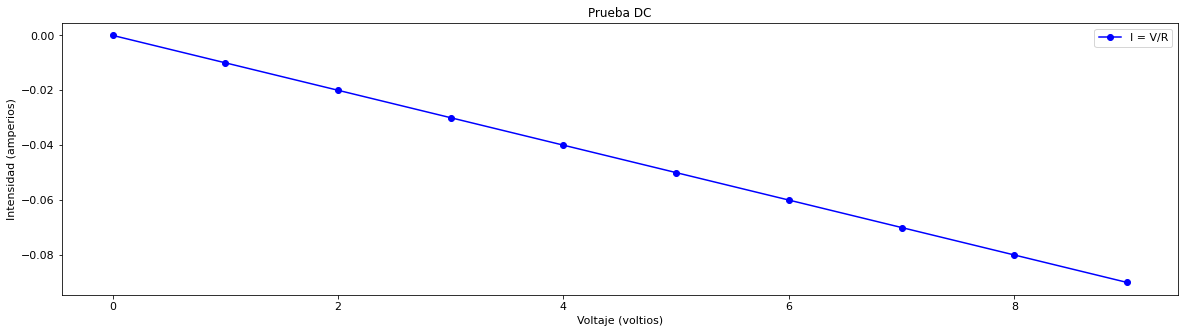

In [100]:
figura = plt.figure()
plt.title("Prueba DC")
plt.xlabel('Voltaje (voltios)')
plt.ylabel('Intensidad (amperios)')
plt.plot(resultados['dc']['V1'], resultados['dc']['I(V1)'], 'bo-', label='I = V/R')
plt.legend()
plt.show()

> **Pregunta:** comenta la gráfica anterior… ¿qué estamos viendo exactamente? 

Estamos viendo una representación gráfica de la Ley de Ohm, y se comprueba que existe un diferencial de intensidad, relaccionado directamente con el diferencial de voltaje, manteniendo constante la resistencia: $\Delta I = \frac{\Delta V}{R}$

> ¿Qué biblioteca estamos usando para graficar? 

La primera linea de código Python de este trabajo es: ```import pylab as plt``` 

Con esta orden, se carga la bibliteca **pylab** en la variable **plt**.

**PyLab** que es un conglomerado de varias librerías entre las que se incluyen *numpy, scipy, sympy, pandas, matplotlib, ipython*. Con esta suite podremos usar de manera muy parecida al interprete de *Python* como si de *MatLab* se tratara y hacer nuestros .py como si fueran **scripts de MatLab**.

**Importante**: *PyLab* es **Open Source**.

 ### Resultados de la simulación `.op` 
 El método `.results` nos devuelve un diccionario con los resultados de la simulación.

In [101]:
print(resultados['op'].results)

{V1: -9.0, I(V1): -0.09}


 > **Pregunta:** justifica el sencillo resultado anterior (análisis `op`). Repite el cálculo con Sympy, atendiendo con mimo a las unidades y al formateo de los resultados (tal y como hemos visto en muchos otros notebooks en clase).
 
El circuito esta compuesto por una pila de $9V$ y una resistencia de 100 $\Omega$.

La tensión en el borne $V1 = -9V$

$$
I = \frac{V}{R} = \frac{-9}{100} = -0.09 A
$$

In [102]:
# Cargamos las librerias necesarias
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to
from sympy import sympify

R = 100*ohms
V = resultados['op'].results['V1']*volts
I = convert_to(V/R, [amperes]).n(2)
print ("I = V/R = -9 V / 100",'\u03A9'," = ")
I



I = V/R = -9 V / 100 Ω  = 


-0.09*ampere

## Resolución del mismo circuito pero con LTspice
¿Cómo? ¿Es esto posible? ¿Desde Jupyter? Sí!!! Pero primero, por comodidad, deberíamos crear un alias del comando que apunte a nuestro ejecutable. Además, con un poco de inteligencia, podemos adelantarnos al hecho de si estamos en Windows o macOS:

In [103]:
import platform
%alias lts /Applications/LTspice.app/Contents/MacOS/LTspice -ascii -b
if platform.system() == "Windows":
    %alias lts C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe -ascii -b

**Pregunta**: ¿Qué significan las opciones `-b` y `-ascii`?

Al crear el *alias* con la opción **-ascii**, se puede leer los archivos ```*.raw``` escritos en ASCII. Activar esta facultad degrada el rendimiento del programa.

Al crear el *alias* con la opción **-b**, dejará los datos en el archivo ```*.raw```.

También tenemos que cambiar ligeramente la sintaxis. Ejecuta esta línea para que se escriba el fichero siguiente. Para LTspice, vamos a reservar la extensión `.net`:

In [104]:
%%writefile "circuito sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
.op
* Comentamos el análisis .dc para centrarnos primero en el .op
* .dc v1 1 10 
.end

Overwriting circuito sencillo.net


Ejecutamos LTspice con el circuito (de la misma manera que antes habíamos hecho con Ahkab).

In [105]:
lts "circuito sencillo.net"

Veamos el contenido de la simulación.

In [106]:
!cat 'circuito sencillo.log'

C i r c u i t :   *   E s t e   e s   u n   c i r c u i t o   s e n c i l l o   a d a p t a d o   p a r a   L T s p i c e 
 
 D i r e c t   N e w t o n   i t e r a t i o n   f o r   . o p   p o i n t   s u c c e e d e d . 
 O p e r a t i n g   B i a s   P o i n t   S o l u t i o n : 
 V ( )                                   - 9       v o l t a g e 
 I ( R 1 )                             - 0 . 0 9       d e v i c e _ c u r r e n t 
 I ( V 1 )                             - 0 . 0 9       d e v i c e _ c u r r e n t 
 
 
 D a t e :   W e d   J a n     6   2 3 : 5 2 : 0 9   2 0 2 1 
 T o t a l   e l a p s e d   t i m e :   0 . 0 0 8   s e c o n d s . 
 
 t n o m   =   2 7 
 t e m p   =   2 7 
 m e t h o d   =   t r a p 
 t o t i t e r   =   3 
 t r a n i t e r   =   0 
 t r a n p o i n t s   =   0 
 a c c e p t   =   0 
 r e j e c t e d   =   0 
 m a t r i x   s i z e   =   2 
 f i l l i n s   =   0 
 s o l v e r   =   N o r m a l 
 M a t r i x   C o m p i l e r 1 :               2   o p c 

Ahora repitamos lo mismo para el análisis `.dc`:

In [107]:
%%writefile "circuito sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
* Ahora obviamos el análisis .op
* .op
.dc v1 1 10 
.end


Overwriting circuito sencillo.net


In [108]:
lts "circuito sencillo.net"

Al ejecutar esta simulación, se genera un fichero `.raw` con los resultados. Es muy parecido al `outfile` que hemos empleado antes con Ahkab. Para leer este fichero, tenemos que usar el paquete [ltspice de Python](https://github.com/DongHoonPark/ltspice_pytool), el cual podéis instalar directamente desde Jupyter:

In [109]:
!pip install ltspice

Ahora ya podemos leer este fichero `.raw` y pintar una recta de voltaje muy parecida a la que obtuvimos anteriormente con Ahkab:

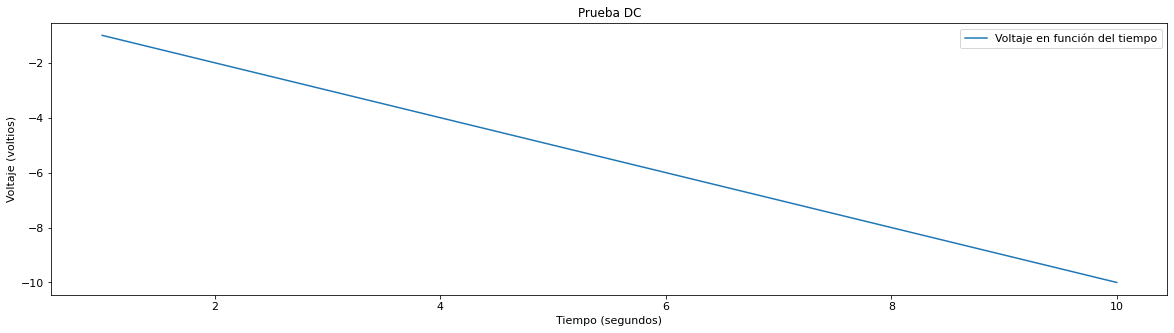

In [110]:
import ltspice
l = ltspice.Ltspice("circuito sencillo.raw")
l.parse()
time = l.get_time()
V1 = l.get_data('V(1)')
plt.title("Prueba DC")
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Voltaje (voltios)')
plt.plot(time, V1, label='Voltaje en función del tiempo')
plt.legend()
plt.show()



** En resumen: ** hemos usado dos *compiladores* Spice distintos para hacer el mismo ejercicio. De igual manera podríamos haber usado [Ngspice](http://ngspice.sourceforge.net) u otro. De hecho, podíamos haber usado Ahkab en modo comando. Si tenemos correctamente instalado este framework, en princpio podemos invocarlo [directamente desde línea de comandos](https://ahkab.readthedocs.io/en/latest/help/Command-Line-Help.html):

In [111]:
!ahkab "circuito sencillo.sp"

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.
2021-01-06 22:52:23
ahkab v. 0.18 (c) 2006-2015 Giuseppe Venturini

Operating Point (OP) analysis

Netlist: circuito sencillo.sp
Title: * este es un circuito sencillo
At 300.00 K
Options:
	vea = 1.000000e-06
	ver = 0.001000
	iea = 1.000000e-09
	ier = 0.001000
	gmin = 0.000000e+00

Convergence reached in 2 iterations.

RESULTS:

Variable    Units      Value        Error    %
----------  -------  -------  -----------  ---
V1          V          -9     9.00001e-12    0
I(V1)       A          -0.09  0              0

ELEMENTS OP INFORMATION:

Part ID      R [Ω]    V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  -------  --------------  ---------------  -------
R1             100              -9            -0.09     0.81

Part ID      V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  --------------  ---------------  -------
V1                      9            -0.09    -0.8

In [112]:
!ahkab "circuito sencillo.sp"

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.
2021-01-06 22:52:27
ahkab v. 0.18 (c) 2006-2015 Giuseppe Venturini

Operating Point (OP) analysis

Netlist: circuito sencillo.sp
Title: * este es un circuito sencillo
At 300.00 K
Options:
	vea = 1.000000e-06
	ver = 0.001000
	iea = 1.000000e-09
	ier = 0.001000
	gmin = 0.000000e+00

Convergence reached in 2 iterations.

RESULTS:

Variable    Units      Value        Error    %
----------  -------  -------  -----------  ---
V1          V          -9     9.00001e-12    0
I(V1)       A          -0.09  0              0

ELEMENTS OP INFORMATION:

Part ID      R [Ω]    V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  -------  --------------  ---------------  -------
R1             100              -9            -0.09     0.81

Part ID      V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  --------------  ---------------  -------
V1                      9            -0.09    -0.8

 ## Análisis de circuito con resistencias en serie

Vamos a resolver (en punto de operación) el siguiente circuito:

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20serie.svg?sanitize=true)

Al igual que antes, grabamos el netlist en disco desde Jupyter gracias a la *palabra mágica* [`%writefile`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile). 

In [113]:
%%writefile "resistencias en serie.net"
* circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

Overwriting resistencias en serie.net


In [114]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en serie.net')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimos los resultados del análisis `.op`:

In [115]:
print(resultados['op'])

OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias en serie.net).
Run on 2021-01-06 22:52:27, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         1.5     -1.5e-12    0
V3          V         6.5     -6.5e-12    0
I(V1)       A        -0.0005   0          0


Los cantidades `V1`, `V2` y `V3` hacen referencia a los distintos valores del potencial que se ha perdido en cada uno de los bornes que has elegido para describir el netlist (`1`, `2`, etc.). Por ejemplo, podemos calcular el *potencial consumido* por la resistencia `R1` y verás que coincide con el del punto `V2` devuelto por Ahkab. **Ejercicio**: compruébalo tú mismo y refléjalo por escrito.

---

La intensidad del circuito completo es $I = \frac{V}{R} = \frac{-9V}{3K \Omega} = -0.0005 A$

La perdida de potencial para V2 es el producto de la intensidad del circuto por esa resistencia: $V2 = -0.0005 \cdot 3000 = -1.5 V$


In [116]:
r1 = 3E3*ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*amperes
v2 = convert_to(intensidad_ahkab*r1, [volts])
v2

-1.5*volt

 > **Pregunta**: reproduce el resto de los valores anteriores de manera *manual* mediante Sympy (es decir, aplicando la ley de Ohm, pero con un *toque computacional*). Te pongo aquí un ejemplo del que puedes partir… En él sólo calculo la corriente que circula por el circuito (sí, justo la que antes Ahkab ha devuelto de manera automática). Para ello necesito previamente computar la resistencia total (`r_total`). Faltarían el resto de resultados y convertirlos a unidades más *vistosas* (mediante la orden `convert_to` y `.n()`).
 
 

In [117]:
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
v1 = 9*volts
r1 = 3*kilo*ohms
r2 = 10*kilo*ohms
r3 = 5*kilo*ohms
r_total = r1 + r2 + r3
intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)
convert_to(solucion_para_intensidad[0], [amperes]).n(2)


0.0005*ampere

In [118]:
## Perdida de potencia V1
voltaje = symbols('v')
ley_ohm2 = Eq(voltaje, convert_to(solucion_para_intensidad[0], [amperes]).n(2)*r_total)
solucionV = solve(ley_ohm2, voltaje)
convert_to(solucionV[0], [volts]).n(2)

9.0*volt

In [119]:
## Perdida de potencia V2
voltaje = symbols('v')
ley_ohm2 = Eq(voltaje, convert_to(solucion_para_intensidad[0], [amperes]).n(2)*r1)
solucionV = solve(ley_ohm2, voltaje)
convert_to(solucionV[0], [volts]).n(2)

1.5*volt

In [120]:
## Perdida de potencia V3
voltaje = symbols('v')
ley_ohm2 = Eq(voltaje, convert_to(solucion_para_intensidad[0], [amperes]).n(2)*(r1+r2))
solucionV = solve(ley_ohm2, voltaje)
convert_to(solucionV[0], [volts]).n(2)

6.5*volt

> **Pregunta**: Demuestra que se cumple la Ley de Kirchhoff de la energía en un circuito, es decir, que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias. Realiza la operación con Sympy.

$$
\sum_i^N V_{\text{fuentes}} = \sum_j^M V_{\text{consumido en resistencias}}
$$

Ten en cuenta que en este caso sólo hay una fuente.

---
Voltaje consumido por R1: $V_{R1} = I \cdot 3K\Omega = 0.0005 \cdot 3000 = 1.5V$

Voltaje consumido por R2: $V_{R2} = I \cdot 10K\Omega = 0.0005 \cdot 10000 = 5V$

Voltaje consumido por R3: $V_{R3} = I \cdot 5K\Omega = 0.0005 \cdot 5000 = 2.5V$

El voltaje de todas las fuentes $V_f$ (en este caso solo una) = $9V$

---

Según la Ley de Kirchhoff $V_f = V_{R1} + V_{R2} +V_{R3}$

$$
9V = 1.5V + 5V + 2.5V
$$

$$
9V = 9V
$$

In [121]:
# solución con Sympy
voltaje = symbols('v')
Vfuente = 9.0*volts 
Icircuito = convert_to(solucion_para_intensidad[0], [amperes]).n(2)
V1 = Icircuito*r1
V2 = Icircuito*r2
V3 = Icircuito*r3
leyK = Eq(voltaje, V1+V2+V3)
sol_leyK = solve(leyK, voltaje)
vol_cir = convert_to(sol_leyK[0], [volts]).n(2)
print("Voltaje consumido por las resistencias:")
print(vol_cir)
print("Voltaje de las fuentes:")
print(Vfuente)
print("Queda comprobada la Ley de Kirchhoff !!")

Voltaje consumido por las resistencias:
9.0*volt
Voltaje de las fuentes:
9.0*volt
Queda comprobada la Ley de Kirchhoff !!


## Análisis `.op` de circuitos con resistencias en paralelo

Vamos a complicar un poco el trabajo añadiendo elementos en paralelo.

 > **Pregunta**: realiza los análisis `.op` de los siguientes circuitos.
 Para ello crea un netlist separado para cada uno donde queden correctamente descritos
 junto con la simulación (`.op`). Comenta los resultados que devuelve Ahkab (no imprimas los resultados de las simulaciones *sin más*).

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20paralelo.svg?sanitize=true)

 Aquí tienes el análisis del primer circuito, para que sirva de ejemplo:

In [122]:
%%writefile "resistencias en paralelo 1.cir"
* resistencia y pila en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 2 3 220
r4 3 0 1.5k
r5 2 0 470
.op
.end

Overwriting resistencias en paralelo 1.cir


In [123]:
%%writefile "resistencias en paralelo 2.cir"
* resistencias en paralelo
v1 0 1 vdc=9 type=vdc
v2 0 5 vdc=1.5 type=vdc
r1 1 2 47
r2 2 3 220
r3 2 5 180
r4 3 4 1k
r5 4 0 560
.op
.end

Overwriting resistencias en paralelo 2.cir


In [124]:
%%writefile "resistencias en paralelo 3.cir"
* resistencias en paralelo
v 0 1 vdc=9 type=vdc
v1 5 1 vdc=0 type=vdc
v2 4 1 vdc=0 type=vdc
v3 2 1 vdc=0 type=vdc
r1 5 0 10k
r2 4 0 2k
r3 2 0 1k
.op
.end

Overwriting resistencias en paralelo 3.cir


In [125]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1.cir')
circuito_y_análisis2 = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 2.cir')
circuito_y_análisis3 = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 3.cir')

circuito = circuito_y_análisis[0]       
circuito2 = circuito_y_análisis2[0]       
circuito3 = circuito_y_análisis3[0]       

análisis_en_netlist = circuito_y_análisis[1]
análisis_en_netlist2 = circuito_y_análisis2[1]
análisis_en_netlist3 = circuito_y_análisis3[1]

lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis2 = ahkab.netlist_parser.parse_analysis(circuito2, análisis_en_netlist2)
lista_de_análisis3 = ahkab.netlist_parser.parse_analysis(circuito3, análisis_en_netlist3)

resultados = ahkab.run(circuito, lista_de_análisis)
resultados2 = ahkab.run(circuito2, lista_de_análisis2)
resultados3 = ahkab.run(circuito3, lista_de_análisis3)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimimos los resultados del análisis `.op`. Como puedes comprobar, Ahkab sólo reporta la intensidad de corriente en las ramas en las que hay una pila (en este caso, la rama donde está la pila `VDD`).

In [126]:
print(resultados['op'])

OP simulation results for '* resistencia y pila en paralelo'(netlist resistencias en paralelo 1.cir).
Run on 2021-01-06 22:52:28, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23532e-12    0
V3          V         -2.8215      2.82151e-12    0
I(VDD)      A         -0.00876467  0              0


In [127]:
print(resultados2['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 2.cir).
Run on 2021-01-06 22:52:28, data file None.
Variable    Units         Value        Error    %
----------  -------  ----------  -----------  ---
V1          V        -9          8.99994e-12    0
V5          V        -1.5        1.50001e-12    0
V2          V        -7.29441    7.29442e-12    0
V3          V        -6.39285    6.39285e-12    0
V4          V        -2.29487    2.29487e-12    0
I(V1)       A        -0.0362891  0              0
I(V2)       A         0.0321912  0              0


In [128]:
print(resultados3['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 3.cir).
Run on 2021-01-06 22:52:28, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V        -9         9e-12    0
V5          V        -9         9e-12    0
V4          V        -9         9e-12    0
V2          V        -9         9e-12    0
I(V)        A        -0.0144    0        0
I(V1)       A         0.0009    0        0
I(V2)       A         0.0045    0        0
I(V3)       A         0.009     0        0


> **Pregunta:** inserta dos *pilas virtuales* de 0 voltios en el resto de ramas del circuito (`Vdummy1` en la rama donde está `R5` y `Vdummy2` en la rama donde está `R3` y `R4`) para que Ahkab nos imprima también la corriente en las mismas. Es muy parecido al tercer circuito que tienes que resolver, donde `V1`, `V2` y `V3` tienen cero voltios. Estas *pilas nulas* son, a todos los efectos, *simples cables*. Una vez que ya tienes las corrientes en todas las ramas, comprueba que se cumple la Ley de Kirchhoff para las corrientes:

$$
I_{\text{entrante}} = \sum_i^{N} I_{\text{salientes}}
$$



In [129]:
%%writefile "mas_pilas_circuito_2.cir"
* resistencias en paralelo
v1 0 1 vdc=9 type=vdc
v2 0 5 vdc=1.5 type=vdc
v3 0 6 vdc=0 type=vdc
r1 1 2 47
r2 2 3 220
r3 2 5 180
r4 3 4 1k
r5 4 6 560
.op
.end

Overwriting mas_pilas_circuito_2.cir


In [130]:
circuito_y_análisis4 = ahkab.netlist_parser.parse_circuit('mas_pilas_circuito_2.cir')

circuito4 = circuito_y_análisis4[0]       

análisis_en_netlist4 = circuito_y_análisis4[1]

lista_de_análisis4 = ahkab.netlist_parser.parse_analysis(circuito4, análisis_en_netlist4)

resultados4 = ahkab.run(circuito4, lista_de_análisis4)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [131]:
print(resultados4['op'])

OP simulation results for '* resistencias en paralelo'(netlist mas_pilas_circuito_2.cir).
Run on 2021-01-06 22:52:28, data file None.
Variable    Units          Value        Error    %
----------  -------  -----------  -----------  ---
V1          V        -9           8.99997e-12    0
V5          V        -1.5         1.5e-12        0
V6          V         0           8.67362e-19    0
V2          V        -7.29441     7.29442e-12    0
V3          V        -6.39285     6.39285e-12    0
V4          V        -2.29487     2.29487e-12    0
I(V1)       A        -0.0362891   0              0
I(V2)       A         0.0321912   0              0
I(V3)       A         0.00409798  0              0


Repite lo mismo para los otros dos circuitos. Realiza además los cálculos con Sympy (recalcula los mismos voltajes que devuelve Ahkab a partir de la corriente que sí te devuelve la simulación) y cuidando de no olvidar las unidades. Recuerda que el objeto `resultados` alberga toda la información que necesitas de manera indexada. Ya han aparecido un ejemplo más arriba. Es decir: no *copies* los números *a mano*, trabaja de manera informáticamente elegante (usando la variable `resultados`). 

 # Circuitos en DC que evolucionan con el tiempo

 ## Carga de un condensador
 Vamos a ver qué le pasa a un circuito de corriente continua cuando tiene un condensador
 en serie.

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensador%20en%20continua.svg?sanitize=true)

 Al igual que antes, primero guardamos el circuito en un netlist externo:

In [132]:
%%writefile "condensador en continua.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Overwriting condensador en continua.ckt


> **Pregunta:** ¿qué significa el parámetro `ic=0`? ¿qué perseguimos con un análisis de tipo `.tran`?

Leamos el circuito:

In [133]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("condensador en continua.ckt")

 Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (`outfile`):

In [134]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[1]['outfile'] = "simulación tran.tsv"

 Ejecutamos la simulación:

In [135]:
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])


Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...  -\ done.
Solving...  -\ done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  -\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador en continua.ckt).
Run on 2021-01-06 22:52:28, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V             -6    6e-12    0
V2          V             -6    6e-12    0
I(V1)       A              0    0        0


 Dibujamos la gráfica de carga del condensador con el tiempo, centrándonos en la intensidad que circula por la pila. 

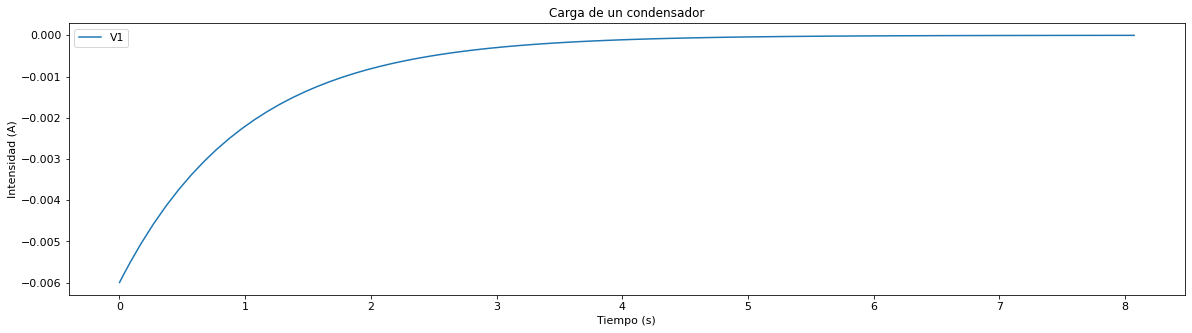

In [136]:
figura = plt.figure()
plt.title("Carga de un condensador")
plt.xlabel('Tiempo (s)')
plt.ylabel('Intensidad (A)')
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], label="V1")
plt.legend()


> **Pregunta:** Etiqueta los ejes convenientemente y comenta la gráfica. Dibuja otra gráfica con el voltaje en el borne `V2`. 

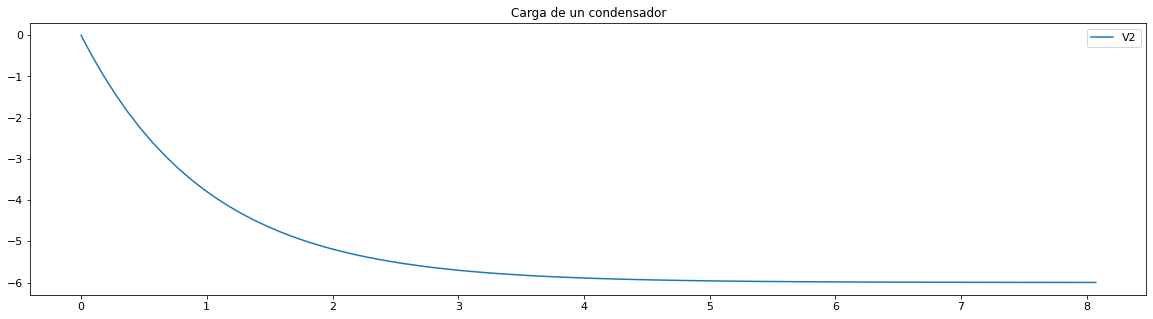

In [137]:
figura = plt.figure()
plt.title("Carga de un condensador")
plt.plot(resultados['tran']['T'], resultados['tran']['V2'], label="V2")
plt.legend()


**¿Por qué son *opuestas*?**

La tensión disminuye proporcionalmente a la carga del condensador

**¿Qué le ocurre al voltaje a medida que evoluciona el circuito en el tiempo?**

Que disminuye segun se carga el condensador

**¿Qué valores devuelve el análisis de tipo `.op`? Justifícalo.**

Devuelve una intensidad $I = 0$, porque mientras los condensadores se cargan, no hay circulación en el circuito.

## Carrera de condensadores

Ahora tenemos un circuito con dos condensadores en paralelo: 

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensadores%20en%20paralelo.svg?sanitize=true)

> **Pregunta:** Crea el netlist de este circuito e identifica qué condensador se satura primero. Dibuja la evolución de la intensidad en ambas ramas de manera simultánea. [Aquí](https://matplotlib.org/gallery/api/two_scales.html) tienes un ejemplo de cómo se hace esto en Matplotlib. Recuerda que para que Ahkab nos devuelva la corriente en una rama, debe de estar presente una pila. Si es necesario, inserta pilas virtuales de valor nulo (cero voltios), tal y como hemos comentado antes. Grafica también los voltajes (en otra gráfica, pero que aparezcan juntos). 

In [138]:
%%writefile "carrera en condensadores.ckt"
* Carga condensador
v0 0 1 type=vdc vdc=10
r1 0 2 3k
c1 2 3 47u ic=0
v1dummy 3 1 type=vdc vdc=0
c2 2 4 22u ic=0
v2dummy 4 1 type=vdc vdc=0
.tran tstep=0.01 tstart=6.5 tstop=7.5 uic=0
.end

Overwriting carrera en condensadores.ckt


In [139]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("carrera en condensadores.ckt")
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[0]['outfile'] = "simulación tran carrera condensadores.tsv"
resultados = ahkab.run(circuito, lista_de_análisis)

Starting transient analysis: 
Selected method: TRAP
Solving...  -\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/done.
Average time step: 0.00900901


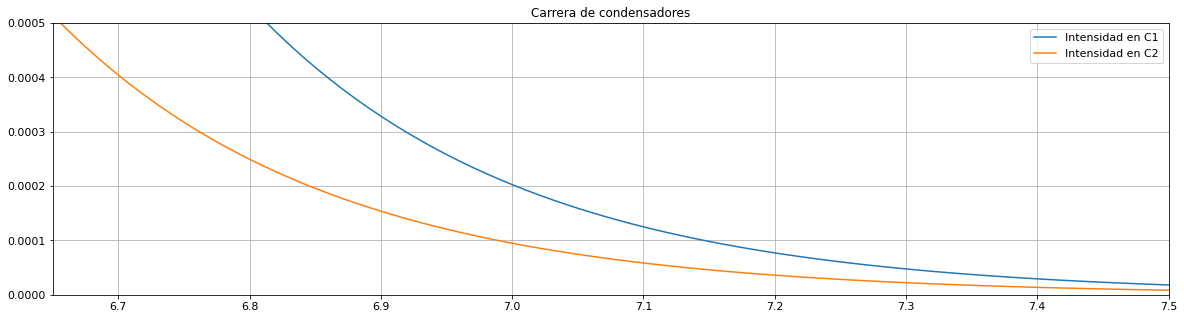

In [140]:
figura = plt.figure()
plt.title("Carrera de condensadores")
plt.xlim(6.65, 7.5)
plt.ylim(0.0, 0.0005)
plt.grid()
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1DUMMY)'],label="Intensidad en C1")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V2DUMMY)'],label="Intensidad en C2")
plt.legend()


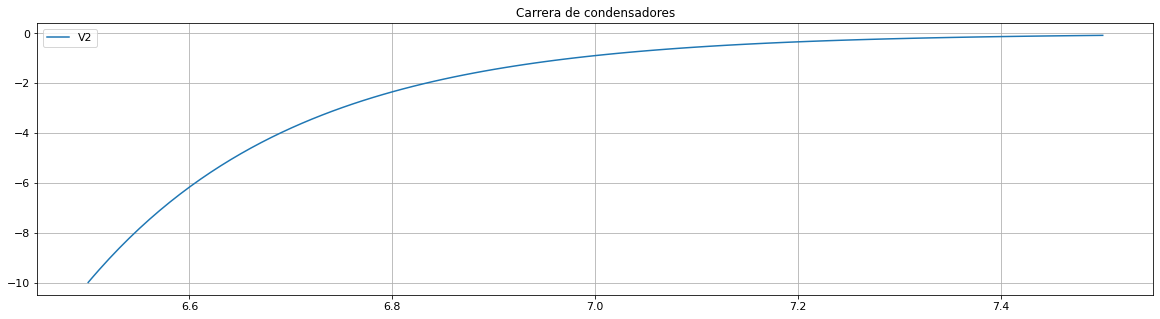

In [141]:
figura = plt.figure()
plt.title("Carrera de condensadores")
plt.grid()
plt.plot(resultados['tran']['T'], resultados['tran']['V2'],label="V2")
plt.legend()


## Circuitos en corriente alterna

** Ejercicio **: Simula este circuito con LTspice y representa el voltaje y la intensidad en función del tiempo.

In [142]:
%%writefile "corriente_alterna.net"
* Circuito en corriente alterna
v1 1 0 sin(0 120 60 0 0)
r1 0 1 10k
.tran 1
.end

Overwriting corriente_alterna.net


In [143]:
lts "corriente_alterna.net"

In [144]:
!cat corriente_alterna.log

C i r c u i t :   *   C i r c u i t o   e n   c o r r i e n t e   a l t e r n a 
 
 . O P   p o i n t   f o u n d   b y   i n s p e c t i o n . 
 
 D a t e :   W e d   J a n     6   2 3 : 5 2 : 3 1   2 0 2 1 
 T o t a l   e l a p s e d   t i m e :   0 . 0 6 5   s e c o n d s . 
 
 t n o m   =   2 7 
 t e m p   =   2 7 
 m e t h o d   =   m o d i f i e d   t r a p 
 t o t i t e r   =   4 1 2 8 
 t r a n i t e r   =   4 1 2 8 
 t r a n p o i n t s   =   2 0 6 5 
 a c c e p t   =   1 5 3 2 
 r e j e c t e d   =   5 3 3 
 m a t r i x   s i z e   =   2 
 f i l l i n s   =   0 
 s o l v e r   =   N o r m a l 
 M a t r i x   C o m p i l e r 1 :               2   o p c o d e s     0 . 0 / [ 0 . 0 ] / 0 . 0 
 M a t r i x   C o m p i l e r 2 :   o f f 
 

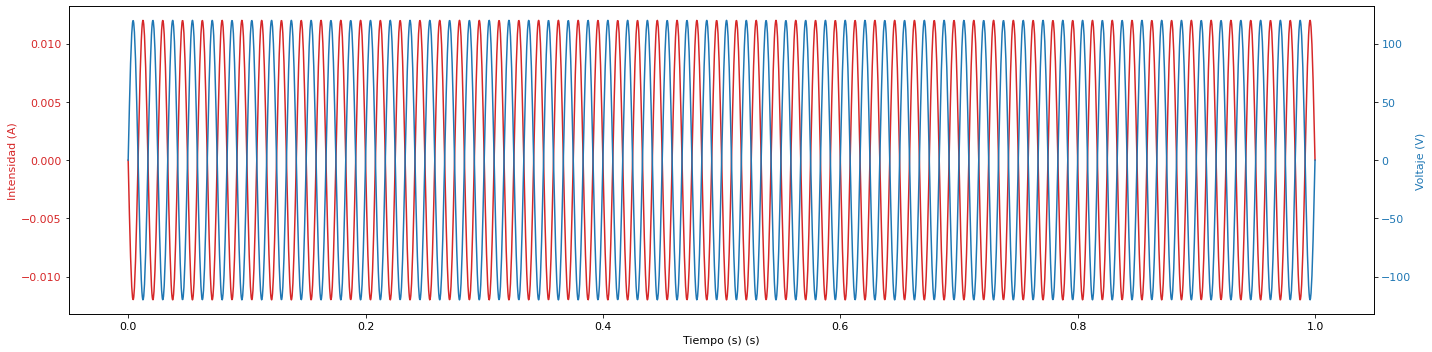

In [145]:
l = ltspice.Ltspice("corriente_alterna.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')
# Podemos pintar la corrente en función del tiempo
# plt.plot(tiempo, corriente)
# O el voltaje
#plt.plot(tiempo, voltaje)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Tiempo (s) (s)')
ax1.set_ylabel('Intensidad (A)', color=color)
ax1.plot(tiempo, corriente, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Voltaje (V)', color=color)  # we already handled the x-label with ax1
ax2.plot(tiempo, voltaje, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rcParams['figure.figsize'] = [20, 5]

plt.show()